In [48]:
import os
import sys
import argparse
import csv
import re
from io import StringIO
import pandas as pd

In [49]:
parts = [
    r'"(?P<host>\S+)',                   # host %h
    r'(?P<indent>\S+)',                             # indent %l (unused)
    r'(?P<user>\S+)',                   # user %u
    r'\[(?P<time>.+)\]',                # time %t
    r'"(?P<method>\w+)',                #action
    r'(?P<request_path>.+)"',               # request "%r"
    r'(?P<status>[0-9]+)',              # status %>s
    r'(?P<size>\S+)',                   # size %b (careful, can be '-')
    r'"(?P<referer>.*)"',               # referer "%{Referer}i"
    r'"(?P<agent>.*)"',                 # user agent "%{User-agent}i"
]
pattern = re.compile(r'\s+'.join(parts)+r'\s*\Z')

In [50]:
# LOG_REGEX = '(?P<ip>[(\d\.)]+) (?P<indent>\S+) (?P<user>\S+) \[(?P<date>.*?) -(.*?)\] "(?P<method>\w+) (?P<request_path>.*?) HTTP/(?P<http_version>.*?)" (?P<status_code>\d+) (?P<response_size>\d+) "(?P<referrer>.*?)" "(?P<user_agent>.*?)"'

In [51]:
# compiled = re.compile(LOG_REGEX)

In [52]:
f = open("data/w3af.txt","r")
contents = f.readlines()
data = []
for line in contents:
    m = pattern.match(line)
    res = m.groupdict()
    data.append(res)

AttributeError: 'NoneType' object has no attribute 'groupdict'

In [53]:
data

[{'host': '192.168.4.163',
  'indent': '-',
  'user': '-',
  'time': '22/Dec/2016:22:32:31 +0300',
  'method': 'GET',
  'request_path': '/ HTTP/1.1',
  'status': '200',
  'size': '3279',
  'referer': '-',
  'agent': 'w3af.org"'},
 {'host': '192.168.4.163',
  'indent': '-',
  'user': '-',
  'time': '22/Dec/2016:22:32:31 +0300',
  'method': 'GET',
  'request_path': '/ HTTP/1.1',
  'status': '200',
  'size': '3279',
  'referer': '-',
  'agent': 'w3af.org"'},
 {'host': '192.168.4.163',
  'indent': '-',
  'user': '-',
  'time': '22/Dec/2016:22:32:31 +0300',
  'method': 'GET',
  'request_path': '/ HTTP/1.1',
  'status': '200',
  'size': '3361',
  'referer': '-',
  'agent': 'w3af.org"'},
 {'host': '192.168.4.163',
  'indent': '-',
  'user': '-',
  'time': '22/Dec/2016:22:32:32 +0300',
  'method': 'GET',
  'request_path': '/ HTTP/1.1',
  'status': '200',
  'size': '3279',
  'referer': '-',
  'agent': 'w3af.org"'},
 {'host': '192.168.4.163',
  'indent': '-',
  'user': '-',
  'time': '22/Dec/201

In [54]:
csv_columns = ['host','indent','user','time','method','request_path','status','size','referer','agent']
csv_file = "w3af.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for df in data:
            writer.writerow(df)
except IOError:
    print("I/O error")

In [87]:
df = pd.read_csv("data/w3af.csv")

In [90]:
df['tool'] = "W3AF"

In [92]:
df

,host,tool,indent,user,time,method,request_path,status,size,referer,agent
0,192.168.4.163,W3AF,-,-,22/Dec/2016:22:32:31 +0300,GET,/ HTTP/1.1,200,3279,-,"w3af.org"""
1,192.168.4.163,W3AF,-,-,22/Dec/2016:22:32:31 +0300,GET,/ HTTP/1.1,200,3279,-,"w3af.org"""
2,192.168.4.163,W3AF,-,-,22/Dec/2016:22:32:31 +0300,GET,/ HTTP/1.1,200,3361,-,"w3af.org"""
3,192.168.4.163,W3AF,-,-,22/Dec/2016:22:32:32 +0300,GET,/ HTTP/1.1,200,3279,-,"w3af.org"""
4,192.168.4.163,W3AF,-,-,22/Dec/2016:22:32:32 +0300,GET,/ HTTP/1.1,200,3279,-,"w3af.org"""
...,...,...,...,...,...,...,...,...,...,...,...
3929,192.168.4.25,W3AF,-,-,22/Dec/2016:22:55:47 +0300,POST,/DVWA/login.php HTTP/1.1,302,385,http://192.168.4.161/DVWA/login.php,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:50.0) ...
3930,192.168.4.25,W3AF,-,-,22/Dec/2016:23:04:32 +0300,GET,/DVWA/dvwa/css/main.css HTTP/1.1,200,1429,http://192.168.4.161/DVWA/index.php,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:50.0) ...
3931,192.168.4.25,W3AF,-,-,22/Dec/2016:23:04:32 +0300,GET,/DVWA/dvwa/images/logo.png HTTP/1.1,304,180,http://192.168.4.161/DVWA/index.php,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:50.0) ...
3932,192.168.4.25,W3AF,-,-,22/Dec/2016:23:04:32 +0300,GET,/DVWA/dvwa/js/dvwaPage.js HTTP/1.1,200,762,http://192.168.4.161/DVWA/index.php,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:50.0) ...


In [93]:
df.to_csv('w3afnew.csv',index=False)

In [57]:
df_host_unique = df.groupby('host').count()

In [58]:
df_host_unique

,indent,user,time,method,request_path,status,size,referer,agent
host,,,,,,,,,
192.168.4.163,3914,3914,3914,3914,3914,3914,3914,3914,3914
192.168.4.25,20,20,20,20,20,20,20,20,20


In [59]:
df_method_unique =df.groupby('method').count()

In [60]:
df_method_unique

,host,indent,user,time,request_path,status,size,referer,agent
method,,,,,,,,,
GET,1278,1278,1278,1278,1278,1278,1278,1278,1278
POST,2656,2656,2656,2656,2656,2656,2656,2656,2656


In [61]:
df_status_unique = df.groupby('status').count()

In [62]:
df_status_unique

,host,indent,user,time,method,request_path,size,referer,agent
status,,,,,,,,,
200,2124,2124,2124,2124,2124,2124,2124,2124,2124
301,77,77,77,77,77,77,77,77,77
302,74,74,74,74,74,74,74,74,74
303,681,681,681,681,681,681,681,681,681
304,1,1,1,1,1,1,1,1,1
403,2,2,2,2,2,2,2,2,2
404,462,462,462,462,462,462,462,462,462
500,513,513,513,513,513,513,513,513,513


In [63]:
size_summary = df['size'].describe()

In [64]:
size_summary

count     3934.000000
mean      1482.197001
std       3253.001089
min        180.000000
25%        237.000000
50%        498.000000
75%       2049.000000
max      68452.000000
Name: size, dtype: float64

In [65]:
# from pyspark.sql import SparkSession

# spark = SparkSession \
#     .builder \
#     .appName("Python Spark SQL basic example") \
#     .config("spark.some.config.option", "some-value") \
#     .getOrCreate()

# df_spark = spark.read.csv("data/acunetix.csv",header=True,sep="|");

In [66]:
# df_spark.toPandas()

In [67]:
from pyspark.sql import functions as F

In [68]:
# (df.agg(F.min(df['size']).alias('min_content_size'),
#              F.max(df['size']).alias('max_content_size'),
#              F.mean(df['size']).alias('mean_content_size'),
#              F.stddev(df['size']).alias('std_content_size'),
#              F.count(df['size']).alias('count_content_size')).toPandas())

In [76]:
status_freq_df=(df
              .groupby('status')
               
              .count())
print("Total distinct HTTP Status codes:",status_freq_df.count())

Total distinct HTTP Status codes: host            8
indent          8
user            8
time            8
method          8
request_path    8
size            8
referer         8
agent           8
dtype: int64


In [77]:
status_freq_df= df.groupby(["status", "host"])['agent'].count().reset_index(name="count")

In [78]:
status_freq_pd_df = (status_freq_df
                         .sort_values(by=['host'],
                                      ascending=False))

In [79]:
# df = df.sort_values(by=['status','count'])
status_freq_pd_df

,status,host,count
1,200,192.168.4.25,16
4,302,192.168.4.25,1
6,304,192.168.4.25,1
9,404,192.168.4.25,2
0,200,192.168.4.163,2108
2,301,192.168.4.163,77
3,302,192.168.4.163,73
5,303,192.168.4.163,681
7,403,192.168.4.163,2
8,404,192.168.4.163,460


In [80]:
status_freq_pd_df = status_freq_pd_df.drop(['host'],axis=1)

In [81]:
status_freq_pd_df

,status,count
1,200,16
4,302,1
6,304,1
9,404,2
0,200,2108
2,301,77
3,302,73
5,303,681
7,403,2
8,404,460


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplot inline 

UsageError: Line magic function `%matplot` not found.


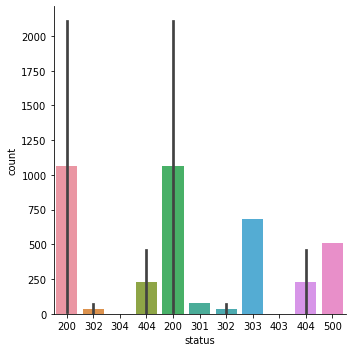

In [83]:
sns.catplot(x='status',y='count',data=status_freq_pd_df,kind='bar',order=status_freq_pd_df['status'])

In [84]:
import pyspark
from pyspark.sql import SparkSession

In [86]:
# # spark = SparkSession.builder.appName('pandasToSparkDF').getOrCreate()
# spark.conf.set("spark.sql.execution.arrow.enabled", "true")
# df_spark = spark.createDataFrame(status_freq_pd_df)

In [323]:
df_spark

DataFrame[status: bigint, count: bigint]

In [325]:
# log_freq_df = df_spark.withColumn('log(count)',
#                                         F.log(df_spark['count']))
# log_freq_df.show()

In [326]:
# log_freq_pd_df = (log_freq_df
#                     .toPandas()
#                     .sort_values(by=['log(count)'],
#                                  ascending=False))
# sns.catplot(x='status', y='log(count)', data=log_freq_pd_df,
#             kind='bar', order=status_freq_pd_df['status'])

In [327]:
host_sum_df =(df
               .groupby('host')
               .count())

host_sum_df

,indent,user,time,method,request_path,status,size,referer,agent
host,,,,,,,,,
192.168.4.25,6539,6539,6539,6539,6539,6539,6539,6539,6539


In [328]:
# host_sum_pd_df = host_sum_df
# host_sum_pd_df.iloc[8]['host']

In [329]:
paths_df = (df
            .groupby('request_path')['status']
            .count().reset_index(name="count"))

paths_df

,request_path,count
0,/ HTTP/1.1,7
1,/!(()%26%26!%7c*%7c*%7c/component/content/cate...,1
2,/$sitepreview/localhost:2006/Wizard/ HTTP/1.1,1
3,/%24(nslookup%20wM4jKgxD)/component/content/ar...,2
4,/%24{%40print(md5(acunetix_wvs_security_test))...,1
...,...,...
933,/tmp HTTP/1.1,1
934,/wstat/ HTTP/1.1,1
935,HTTP/1.1,1
936,http://192.168.4.161/index.php HTTP/1.1,1


In [330]:
not200_df = df.loc[df['status'] !=200]#filtering data whose status is not equal to 200


In [331]:
not200_df

,host,indent,user,time,method,request_path,status,size,referer,agent
0,192.168.4.25,-,-,22/Dec/2016:16:30:52 +0300,POST,/administrator/index.php HTTP/1.1,303,382,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1,192.168.4.25,-,-,22/Dec/2016:16:29:05 +0300,POST,/index.php/component/search/ HTTP/1.1,500,2011,-,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
2,192.168.4.25,-,-,22/Dec/2016:16:28:53 +0300,POST,/index.php/component/search/ HTTP/1.1,303,374,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6,192.168.4.25,-,-,22/Dec/2016:16:24:39 +0300,POST,/index.php/component/search/ HTTP/1.1,303,412,-,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
7,192.168.4.25,-,-,22/Dec/2016:16:28:52 +0300,POST,/index.php/component/search/ HTTP/1.1,303,377,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
...,...,...,...,...,...,...,...,...,...,...
6532,192.168.4.25,-,-,22/Dec/2016:16:21:10 +0300,POST,/index.php/component/search/ HTTP/1.1,303,350,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6534,192.168.4.25,-,-,22/Dec/2016:16:22:11 +0300,POST,/index.php/component/search/ HTTP/1.1,303,376,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6535,192.168.4.25,-,-,22/Dec/2016:16:33:44 +0300,POST,/index.php/component/search/ HTTP/1.1,303,417,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6536,192.168.4.25,-,-,22/Dec/2016:16:23:07 +0300,POST,/index.php/component/search/ HTTP/1.1,303,393,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...


In [332]:
error_endpoints_freq_df = (not200_df
                               .groupby('request_path')['status']
                               .count().reset_index(name="count"))
                              
                        

In [333]:
error_endpoints_freq_df.sample(20)

,request_path,count
220,"/index.php/component/content/?format=1'\""&type...",1
336,/index.php/component/users/?view=8OWgL7fS';%20...,1
356,/index.php/http://hitjj0oOIuFSr.bxss.me//searc...,1
106,/admin/mysql/main.php HTTP/1.1,2
2,/$sitepreview/localhost:2006/Wizard/ HTTP/1.1,1
24,//WEB-INF/jboss-web.xml HTTP/1.1,1
142,/index.php HTTP/1.1,278
308,/index.php/component/file:///etc/passwd/catego...,1
272,/index.php/component/content/?format=http://te...,1
136,/http://testasp.vulnweb.com/t/fit.txt%3F.php/c...,1


In [334]:
# unique_host_count = (df['host']
#                      .unique()
#                      .count())
# unique_host_count